# **Linear regression - Intro to ML**

In [7]:
#import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#create an array of x values
x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**plotting lines to see how slope and intercepts affect a line**

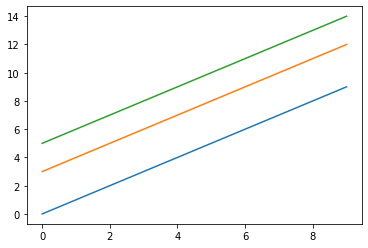

In [9]:
y = 0+(1*x)
y2 = 3+(1*x)
y3 = 5+(1*x)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)


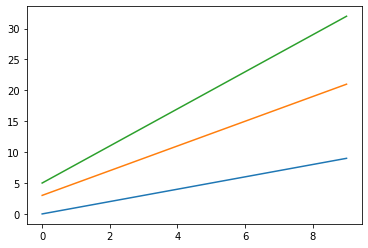

In [10]:
y = 0+(1*x)
y2 = 3+(2*x)
y3 = 5+(3*x)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)

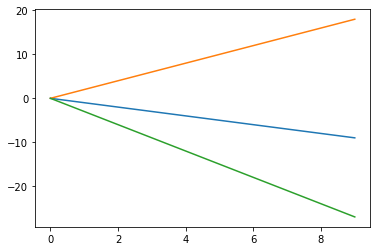

In [11]:
y = 0+(-1*x)
y2 = 0+(2*x)
y3 = 0+(-3*x)

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)

**The whole goal of linear regression is to find the "best" y-intercept and slope to "fit" our data!**

In [12]:
#load and inspect the data
reg_data = pd.read_csv('regression_data.csv')
reg_data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


In [13]:
reg_data.shape

(1000, 8)

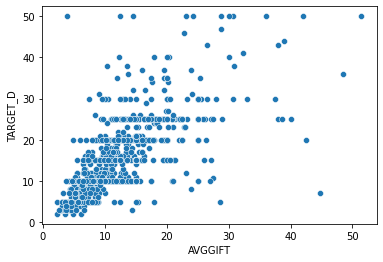

In [14]:
#from basic understanding of the data, it looks like a good predictor of what people will donate on this drive would be based on how much they have given before
#so we are going to use AVGGIFT for this regression

sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

Not really a GOOD one, as values are scattered all over.
Notice, there are values that are grouped by 5, 10, ... dollar marks as people are likely to donate these values more.

**finding best fitting line**

In [15]:
#sns.pairplot(reg_data)
#plt.show()

In [16]:
#so how do we find the best-fitting line:

#lets import sklearn as it has linear_model package which can do it for us

from sklearn import linear_model


In [17]:
y= reg_data['TARGET_D'] #what we are trying to predict
X= reg_data[['AVGGIFT']] #two brackets because we are trying to import the cloumn

#two brackets for x because it will go through this column, and give us back y
#two brackets also allows us to add more columns, with single bracket it won't work
#more columns are added, it could be stronger in terms of prediction in some cases

In [18]:
#first thing you do is that you declare or tell sklearn we are going to use:
#from linear_model package, we are using LinearRegression function
model = linear_model.LinearRegression()

#now we are going to fit the data

model = model.fit(X,y) #capital X here because it allows us to have multi-dimensions, or that's how we refere to it

#now in the internal memory of Python, it has already stored the best fitting line.

In [19]:
#find the value of the y-intercept
print(model.intercept_)

#print coefficient of X (slope)
print(model.coef_)


3.6731826984235827
[0.95595086]


In [20]:
#now let's build the regression line

regression_line = model.intercept_ + model.coef_[0]*reg_data['AVGGIFT'] #[0] is there because it helps python find coefficient for respective columns, we only have one now so its [0]

#for more columns
#regression_line = model.intercept_ + model.coef_[0]*reg_data['AVGGIFT'] +model.coef_[1]*reg_data['IC1']...

**Now let's plot it together**

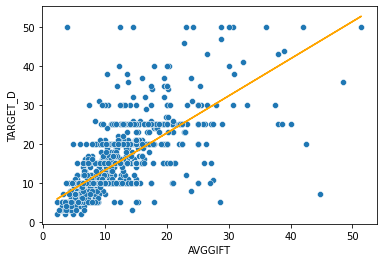

In [21]:
plt.plot(reg_data['AVGGIFT'],regression_line, c= 'orange')
sns.scatterplot(x='AVGGIFT',y='TARGET_D', data = reg_data)
plt.show()

**Now we have regression line, how do we use it to predict:**

In [22]:
model.predict([[10],[20],[30],[500]]) #it will predict how much money people will delete in terms of who have donated 10, 20, 30 before

array([ 13.23269127,  22.79219984,  32.3517084 , 481.64861113])

**Findings:** Looks like people who have donated less amounts before tend to give more now, but people who donated higher amounts, tend to give us lower amounts now

In [23]:
#This is basically R-squared
model.score(X,y) #what if our prediction model is not correct, perhaps we should have used other kind of regression model

0.5203659259714741

**Warning:** It is decent for this one, but we would not use it in production. But maybe we can add more variables to see if it betters our prediction model.

In [24]:
#Incorporating more variables

y = reg_data['TARGET_D']
X = reg_data.drop(['TARGET_D'],axis=1) #dropping only target-d so this line is adding all the other columns

In [25]:
#now repeating the above process
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#find the value of the y-intercept
print(model.intercept_)

#print coefficient of X (slope)
print(model.coef_)

#we get following output because now it's finding intercepts for multiple lines

3.7604323600782354
[ 2.59524877e-03 -1.02519484e-01 -9.54071068e-02 -9.46876520e-02
  2.89332425e-01 -1.26561451e-04  8.56301222e-01]


In [27]:
#now let's build the regression line
#so the question it will look like  y = 3.76 + m1 X1+ m2 x2 +m3 X3....

#we cannot plot this because, that will be multiple dimenstions and it would not work.
#regression_line1 = model.intercept_ + model.coef_[0]*reg_data['AVGGIFT']

model.score(X,y)

0.5640186699298623

So the new model is a slightly better as it increased from .52... but it didn't increase it by a lot.

model.predict([[10],[20]...) won't work because it will have conflicts with other variables in the model and it needs all the variables in the predict command.

In [28]:
#but we can input values and try to calculate it this way:

model.predict([[10000,100,200,254,365,214,10],[1000,200,300,454,265,114,20]]) #more complex things required from us

#first list includes all the variables, second includes all the variables [HV1, IC1, IC2...]

array([90.47114984,  8.02614737])

**What if:** we had some variables (columns) that would drag the predictive power (because they were doing different things or double counting things).

**The most important line in this notebook**
The best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves.

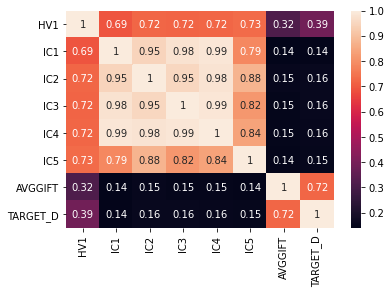

In [29]:
#so let's create the correlation matrix + the heat map

correlations_matrix = reg_data.corr()
sns.heatmap(correlations_matrix, annot = True)
plt.show()

Notice: there are a lot of highly correlated data, we do not want these as they are probably double counting or giving same predictions

**Reduce the data** because we must remove the highly correlated data

In [30]:
reduced_data = reg_data.drop(['IC2','IC3','IC4'], axis=1)
reduced_data.columns

Index(['HV1', 'IC1', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

In [31]:
y = reduced_data['TARGET_D']
X = reduced_data[['HV1','IC1','IC5','AVGGIFT']]

In [32]:
model = linear_model.LinearRegression()
model = model.fit(X,y)

In [33]:
model.score(X,y)

0.5638520209627318

In [34]:
#notice, the prediction power did not decrease by much because we removed highly correlated data or redundant data.

#now we have a condensed data that won't tax our devices or servers a lot, increasing the speed and better coding practices.

# **Session 2:** preprocessing the data

In [35]:
#import remaining libraries that we haven't loaded yet

%matplotlib inline

In [36]:
data1 = pd.read_csv('https://raw.githubusercontent.com/ironhack-edu/data_1.07_activities/master/files_for_activities/csv_files/regression_data1.csv')

In [37]:
data1.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


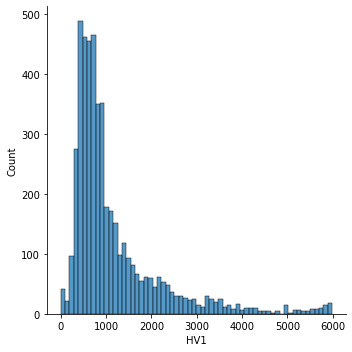

In [38]:
#create histogram to inspect:

sns.displot(data1['HV1'])
plt.show()

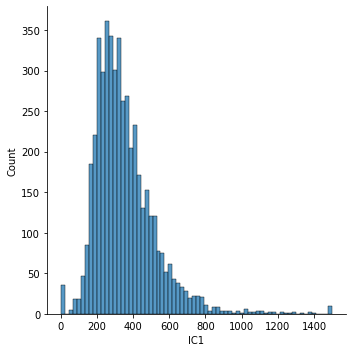

In [39]:
sns.displot(data1['IC1'])
plt.show()

**Finding:** there is a spike for 0! Be careful about this. What is the reason for this? Inspect source file and see how the data was created/stored. It could be also that people are unemployed. Also a spike at value over 1400. It's a long tail and there is a spike at the end. This could be sum of over this value, so its adding a lot of values after that (greater or equal than 1500).Basically a lumping of categories.

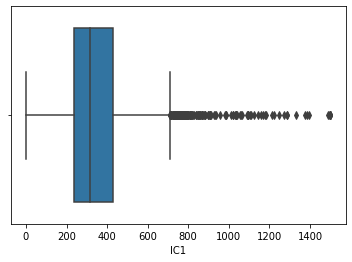

In [40]:
sns.boxplot(x=data1['IC1'])
plt.show()

**how do we get to normal distribution from the above displot** we can cut off the outliers

In [41]:
iqr = np.percentile(data1['IC1'],75)-np.percentile(data1['IC1'],25)
upper_limit = np.percentile(data1['IC1'],75)+ 1.5*iqr
lower_limit = np.percentile(data1['IC1'],25)- 1.5*iqr

In [42]:
lower_limit

-43.0

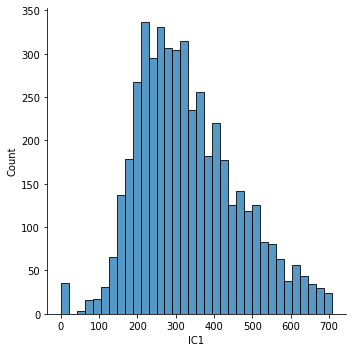

In [43]:
#now restrict the data to between lower and upper limits

#data1 = data1[(data1['IC1']>lower_limit)]&data1[(data1['IC1']<upper_limit)]
#sns.displot(data1['IC1'])
#plt.show()

data1 = data1[(data1['IC1']>lower_limit)&(data1['IC1']<upper_limit)]
sns.displot(data1['IC1'])
plt.show()



**Class Activity** Practice/Breakout Room

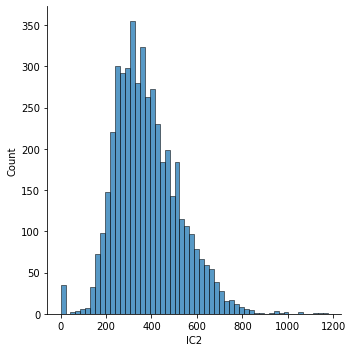

In [44]:
#plot to view distribution and spikes
sns.displot(data1['IC2'])
plt.show()

In [45]:
data1['IC2'].describe()

count    4670.000000
mean      380.943255
std       141.325353
min         0.000000
25%       280.000000
50%       361.000000
75%       465.000000
max      1177.000000
Name: IC2, dtype: float64

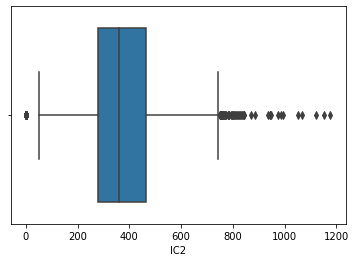

In [46]:
#create box plot to see outliers 
sns.boxplot(x=data1['IC2'])
plt.show()

In [47]:
#calcluate iqr and limits (upper and lower)
iqr = np.percentile(data1['IC2'],75)-np.percentile(data1['IC2'],25)
upper_limit = np.percentile(data1['IC2'],75)+ 1.5*iqr
lower_limit = np.percentile(data1['IC2'],25)- 1.5*iqr

In [48]:
lower_limit
#checking if upper and lower limits worked

2.5

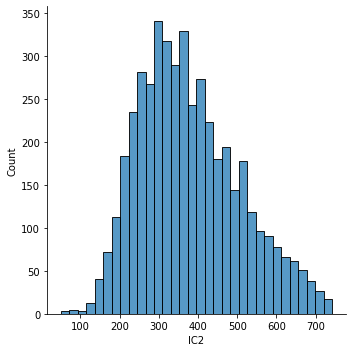

In [49]:

#filter data that are within the upper and lower limits
data1 = data1[(data1['IC2']>lower_limit)&(data1['IC2']<upper_limit)]

#plot
sns.displot(data1['IC2'])
plt.show()

**Transforming features that have different scales** We could use log transformations

In [50]:
#reduce range of 0 to million to a reange of 0-5

def log_tansform_clean1(x):
  x= np.log10(x)
  if np.isfinite(x):
    return x
  else:
    return 0

In [51]:
#log(0) is undefined, so we will get error message- it will approach negative infinity as the closer we get to 0, limit goes to 0 
np.log10(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


-inf

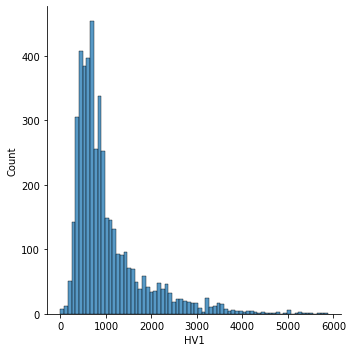

In [52]:
#lets do a displot of HV1
sns.displot(data1['HV1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


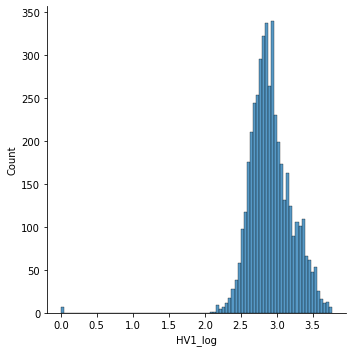

In [53]:
#lets do it for log transformed

data1['HV1_log'] = list(map(log_tansform_clean1, data1['HV1']))
sns.displot(data1['HV1_log'])
plt.show()

Notice there are still 0 values, let's do somthing else to fix it:

In [54]:
def log_tansform_clean2(x):
  x= np.log10(x)
  if np.isfinite(x):
    return x
  else:
    return np.NAN #np.NAN replaces the null values with mean

NaN is short for Not a number. It is used to represent entries that are undefined. It is also used for representing missing values in a dataset.

The concept of NaN existed even before Python was created. IEEE Standard for Floating-Point Arithmetic (IEEE 754) introduced NaN in 1985.

NaN is a special floating-point value which cannot be converted to any other type than float.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


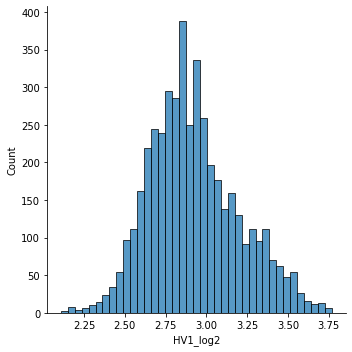

In [55]:
data1['HV1_log2'] = list(map(log_tansform_clean2, data1['HV1']))
sns.displot(data1['HV1_log2'])
plt.show()

Much much nicer!

# **1.07 Activity 2**

Keep using the same file.

 1.Repeat the process(log transformation) for the column IC3. Define the function again yourself.
2. Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

**1. Repeat the process(log transformation) for the column IC3. Define the function again yourself.**

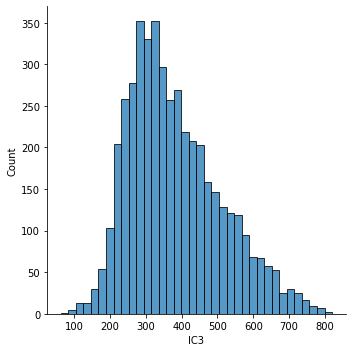

In [56]:
sns.displot(data1['IC3'])
plt.show()

In [57]:
#define the function for log transformation
def log_tansform_clean3(x):
  x= np.log10(x)
  if np.isfinite(x):
    return x
  else:
    return np.NAN

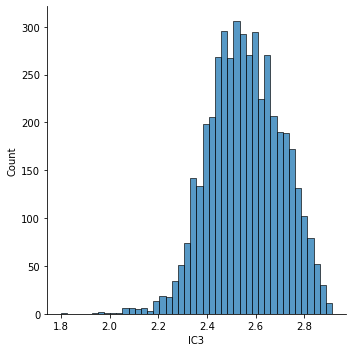

In [58]:
data1['IC3'] = list(map(log_tansform_clean2, data1['IC3']))
sns.displot(data1['IC3'])
plt.show()

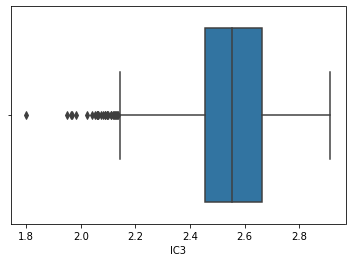

In [59]:
#remove the outliers
sns.boxplot(x=data1['IC3'])
plt.show()


In [60]:
iqr = np.percentile(data1['IC3'],75)-np.percentile(data1['IC3'],25)
upper_limit = np.percentile(data1['IC3'],75)+ 1.5*iqr
lower_limit = np.percentile(data1['IC3'],25)- 1.5*iqr

In [61]:
lower_limit

2.1377444620331216

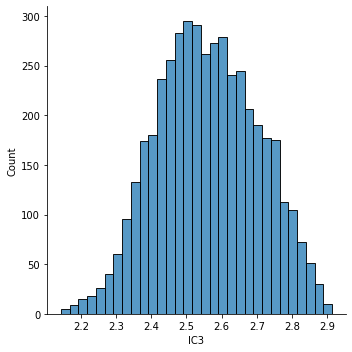

In [62]:
#filter data that are within the upper and lower limits
data1 = data1[(data1['IC3']>lower_limit)&(data1['IC3']<upper_limit)]

#plot
sns.displot(data1['IC3'])
plt.show()

# **BoxCox Transformation** Another one of many transforms, to get the data more likely
Note: It does not like negative values

In [63]:
len(data1[data1['IC1']<=0]) #does it have negative value?

0

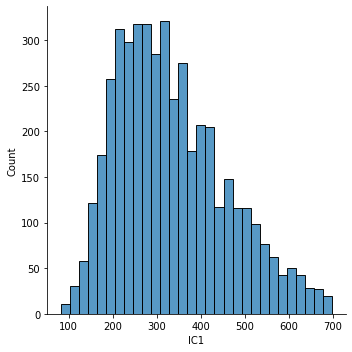

In [64]:
len(data1[data1['IC1']<=0])
#but if it did we would run the following code
data1['IC1_']=np.where(data1['IC1']<=0,0,data1['IC1'])
#now calculate the mean of the new column, excluding zeros in the count
mean = np.sum(data1['IC1_'])/len(data1[data1['IC1_']>0])

data1['IC1_']=data1['IC1_'].replace(0,mean)
sns.displot(data1['IC1'])
plt.show()


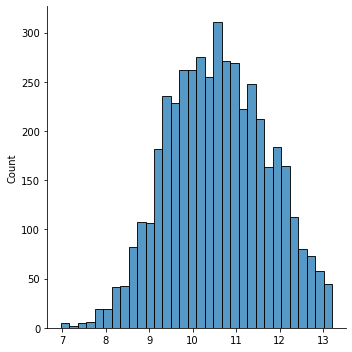

In [65]:
#run boxcox by using stats from scipy

from scipy import stats
xt,lmda = stats.boxcox(data1['IC1_'])
sns.displot(xt)
plt.show()

What is a Box Cox Transformation?
A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. 

# **1.07 Activity 3**

Repeat the same steps for column IC5 for box-cox transformation.

In [66]:
len(data1[data1['IC5']<=0]) #does it have negative value?

0

In [67]:
mean1=np.mean(data1['IC5'])
mean1

15297.517923905873

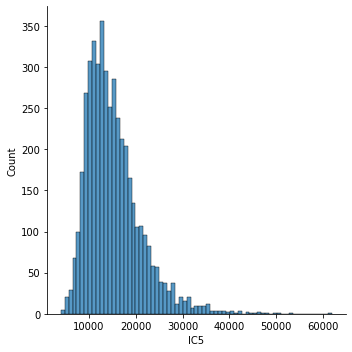

In [68]:
#but if it did we would run the following code
data1['IC5_']=np.where(data1['IC5']<=0,0,data1['IC5'])


#now calculate the mean of the new column, excluding zeros in the count
mean = np.sum(data1['IC5_'])/len(data1[data1['IC5_']>0])

#now replacing the 0 with mean, we only do that when we have a few 0 values. Not a lot

data1['IC5_']=data1['IC5_'].replace(0,mean)
sns.displot(data1['IC5'])
plt.show()

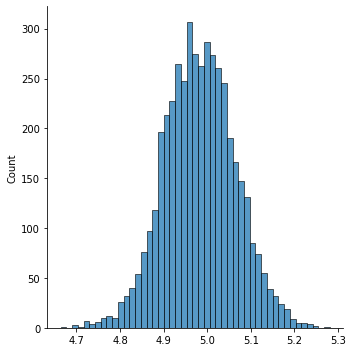

In [69]:

#run boxcox by using stats from scipy

from scipy import stats
xt1,lmda = stats.boxcox(data1['IC5_'])
sns.displot(xt1)
plt.show()

# Putting it back into ML model after transforming


In [70]:
data1['IC1_boxC_transformed'] = xt
data1['IC5_boxC_transformed'] = xt1

data1.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D,HV1_log,HV1_log2,IC1_,IC5_,IC1_boxC_transformed,IC5_boxC_transformed
0,2346,420,446,2.670246,503,14552,15.500000,21.0,3.370328,3.370328,420,14552,11.483616,4.988542
1,497,350,364,2.552668,384,11696,3.080000,3.0,2.696356,2.696356,350,11696,10.905402,4.938321
2,1229,469,502,2.705008,544,17313,7.500000,20.0,3.089552,3.089552,469,17313,11.843638,5.027279
3,325,148,181,2.232996,209,6334,6.700000,5.0,2.511883,2.511883,148,6334,8.435641,4.787894
4,768,174,201,2.342423,249,7802,8.785714,10.0,2.885361,2.885361,174,7802,8.869111,4.840633


##Drop the IC1_ and IC5_##

In [71]:
#data1 = data1.drop(['IC1_','IC5_','IC1','IC5'], axis =1) #already dropped
data1.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D,HV1_log,HV1_log2,IC1_,IC5_,IC1_boxC_transformed,IC5_boxC_transformed
0,2346,420,446,2.670246,503,14552,15.500000,21.0,3.370328,3.370328,420,14552,11.483616,4.988542
1,497,350,364,2.552668,384,11696,3.080000,3.0,2.696356,2.696356,350,11696,10.905402,4.938321
2,1229,469,502,2.705008,544,17313,7.500000,20.0,3.089552,3.089552,469,17313,11.843638,5.027279
3,325,148,181,2.232996,209,6334,6.700000,5.0,2.511883,2.511883,148,6334,8.435641,4.787894
4,768,174,201,2.342423,249,7802,8.785714,10.0,2.885361,2.885361,174,7802,8.869111,4.840633


## Normalizing() and Scaling()

In [72]:
data1['HV1'].describe()

count    4547.000000
mean     1042.584561
std       798.123094
min         0.000000
25%       544.500000
50%       778.000000
75%      1228.000000
max      5882.000000
Name: HV1, dtype: float64

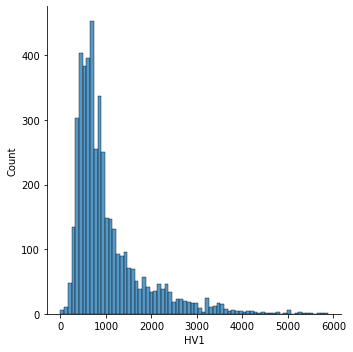

In [73]:
sns.displot(data1['HV1'])
plt.show()

[TDS article about the following:](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [74]:
#importing libraries needed

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..

data3 = pd.read_csv('https://raw.githubusercontent.com/ironhack-edu/data_1.07_activities/master/files_for_activities/csv_files/regression_data1.csv')


In [75]:
Y = data3['TARGET_D']
X = data3.drop(['TARGET_D'],axis=1)
num = X.select_dtypes(include = np.number)
cat = X.select_dtypes(include = np.object)

In [76]:
transformer = MinMaxScaler().fit(num)
x_normalized = transformer.transform(num)
print(x_normalized.shape)
pd.DataFrame(x_normalized,columns=num.columns) #columns = part after comma brings back the column headers

#output will make convert all values into numbers between 0 and 1

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,0.392177,0.280000,0.297333,0.335725,0.360832,0.083382,0.029569
1,0.083083,0.233333,0.242667,0.256098,0.275466,0.067017,0.001829
2,0.205450,0.312667,0.334667,0.363702,0.390244,0.099202,0.011701
3,0.054330,0.098667,0.120667,0.122669,0.149928,0.036293,0.009915
4,0.128385,0.116000,0.134000,0.157819,0.178623,0.044705,0.014573
...,...,...,...,...,...,...,...
4838,0.117185,0.198000,0.223333,0.290531,0.335725,0.087427,0.029569
4839,0.561184,0.189333,0.303333,0.246055,0.320660,0.138893,0.021433
4840,0.117018,0.214667,0.276667,0.255380,0.319943,0.082281,0.020263
4841,0.100468,0.137333,0.150000,0.180057,0.207317,0.056159,0.023985


In [77]:
transformer = StandardScaler().fit(num)
x_standardized = transformer.transform(num)
print(x_standardized.shape)
pd.DataFrame(x_standardized,columns=num.columns)

#output will standardize values

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,1.145640,0.392017,0.241382,0.402231,0.322435,-0.203394,0.361021
1,-0.646030,-0.016528,-0.207586,-0.263776,-0.351134,-0.504086,-0.862998
2,0.063274,0.677998,0.547994,0.636234,0.554505,0.087295,-0.427397
3,-0.812697,-1.195472,-1.209550,-1.379790,-1.341676,-1.068619,-0.506239
4,-0.383432,-1.043726,-1.100046,-1.085786,-1.115266,-0.914062,-0.300687
...,...,...,...,...,...,...,...
4838,-0.448355,-0.325855,-0.366367,0.024227,0.124327,-0.129064,0.361021
4839,2.125293,-0.401727,0.290659,-0.347777,0.005462,0.816598,0.002009
4840,-0.449324,-0.179946,0.071650,-0.269776,-0.000199,-0.223609,-0.049613
4841,-0.545254,-0.856963,-0.968641,-0.899784,-0.888857,-0.703599,0.114640


1.07 Activity 4

Keep using the same file (files_for_activities/regression_data.csv) for this exercise.

Load data regression_data.csv.
Select 3 numeric columns.
Plot distributions.
Normalize.
Plot new distributions.


In [78]:
data4 = pd.read_csv('https://raw.githubusercontent.com/ironhack-edu/data_1.07_activities/master/files_for_activities/csv_files/regression_data1.csv')

In [79]:
data4.dtypes


HV1           int64
IC1           int64
IC2           int64
IC3           int64
IC4           int64
IC5           int64
AVGGIFT     float64
TARGET_D    float64
dtype: object

In [80]:
data4 = data4.drop(['IC1','IC2','IC3','IC4','TARGET_D'],axis=1)
data4.head()

,HV1,IC5,AVGGIFT
0,2346,14552,15.500000
1,497,11696,3.080000
2,1229,17313,7.500000
3,325,6334,6.700000
4,768,7802,8.785714


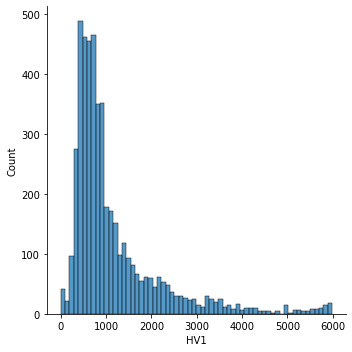

In [81]:
sns.displot(data4['HV1'])
plt.show()

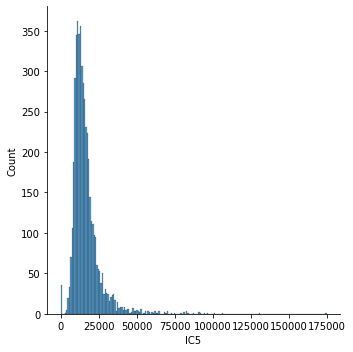

In [82]:
sns.displot(data4['IC5'])
plt.show()

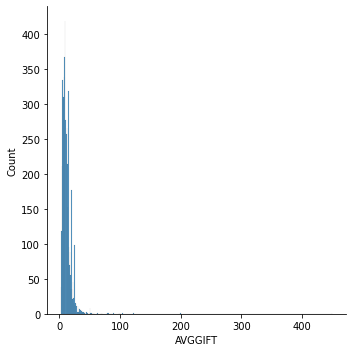

In [83]:
sns.displot(data4['AVGGIFT'])
plt.show()

In [84]:
def log_tansform_cleana(x):
  x= np.log10(x)
  if np.isfinite(x):
    return x
  else:
    return np.NAN #np.NAN replaces the null values with mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


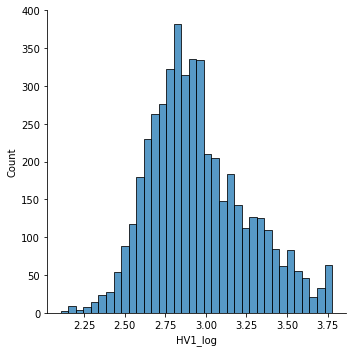

In [85]:


data4['HV1_log'] = list(map(log_tansform_cleana, data4['HV1']))
sns.displot(data4['HV1_log'])
plt.show()

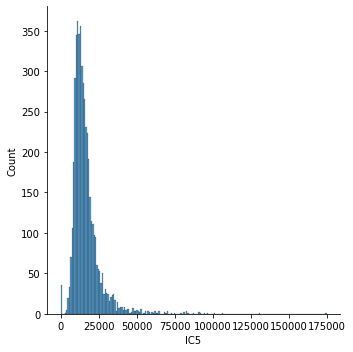

In [86]:
len(data4[data4['IC5']<=0])
#but if it did we would run the following code
data4['IC5_']=np.where(data4['IC5']<=0,0,data4['IC5'])
#now calculate the mean of the new column, excluding zeros in the count
mean = np.sum(data4['IC5_'])/len(data4[data4['IC5_']>0])

data4['IC5_']=data4['IC5_'].replace(0,mean)
sns.displot(data4['IC5'])
plt.show()